In [ ]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
import math
from fastbook import *

# Cross-Entropy Loss

The Cross-Entropy Loss function is typically used as a loss function in multi-class classification problems.

The output for a neural network doing classification is a set of probabilities (a so-called probability distribution where every class is associated with a probability).  We try to adapt weights to optimize the resulting probabilities to match as close as possible the ground truth.  To iteratively adapt the weights and improve the prediction, a loss function is needed.  For multi-class classification, Cross-Entropy Loss is used.

## Shannon Information

An occurrence of an unlikely event gives more information than the occurrence of a very likely event.  Shannon came up with a way to quantify how unpredictable a series of events is; measuring the "disorder" of system and quantifying uncertainty of a probability distribution.

Let's do a thought experiment with two people: person A and person B.  They can agree upfront on the meaning of a series of bits thrown back and forth over a wall (like some mapping function saying "0101" means event "abc" happened).  Beyond the bits used for communicating they cannot exchange other information.  Let's now assume a number of different scenarios.

### A fair coin flip

Assume person A does a fair coin flip where the probability distribution of having heads is the same as having tails, each being 50 percent:  $P(H)=0.5$ and $P(T)=0.5$

Both A and B can agree to exchange the outcome of the coin flip using a single bit of information where 0 means heads and 1 means tails.  When B receives the bit, he will know exactly what the outcome of the coin flip was.  We can say the entropy of this probability distribution is 1 bit.

### Winning team out of 8

Assume on the one side of the wall person A observes one team out of 8 winning a tournament.  Each team has a probability of 1/8 or 0.125 of winning, so this is again an equal probability distribution: $P(A)=0.125$, $P(B)=0.125$, $P(C)=0.125$, ..., $P(H)=0.125$

A and B can agree to communicate the winning team using 3 bits of information. 3 bits give them $2^3=8$ classes, one for each team.  Let's say "000" means team A; "001" team B; "010" team C and so on.  We can say the entropy for this probability distribution is 3 bits.

If we generalize this: for a uniform distribution of M equally possible outcomes, the entropy is: $log_2\,M$

This also holds for distributions where the number of outcomes is not exactly a power of 2, like was the case in the examples before.  Let's have a look at this in the next example.

### 10 outcomes

If A observes an outcome out of equal distributation of 10 possible outcomes (each with a probability of 0.1), then these can all be encoded using 4 bits.  4 bits allows for representing $2^4=16$ states which is more than needed for our 10 possible outcomes.  There are 6 "unused" states.

We can group outcomes in groups of 3.  There are 1000 such unique triplets possible.  If we encode our data per 3 observations, then every such triplet can be encoded using 10 bits, giving us a total of $2^10=1024$ states.  That's still too much but we're already much more efficient in encoding out information as we can represent on average 1 outcome = 1/3 triplet using $\frac{10}{3}=3.333...$ bits.  This is better but not perfect yet.  

We grouped our information by 3 outcomes at a time; which gave us $10^3$ outcomes.  Let's call the number of items by which we group is G instead of 3. The number of states we can present with B bits is $2^B$.  The most efficient encoding is one where $2^B = 10^G$ where G is the number of grouped observations and B is the number of bits.

$$2^B = 10^G$$

Let's take the $log_2$ of both sides:

$$B = log_2 (10^G)$$
$$B = G\, log_2 10$$
$$\frac{B}{G} = log_2 10$$

$\frac{B}{G}$ is our entropy and $log_2 10$ is approximately 3.322...

So for a uniform distribution of M possible outcomes ($U(M)$) in which every probability of an outcome is $p_{1..M} = \frac{1}{M}$, the entropy is: $$H(U(M))=log_2\,M$$

### Non-uniform distributions

As we've seen before, each outcome with probability $p$ needs $log_2\,M$ bits to encode or $log_2\,\frac{1}{p}$ which is $-log_2\,p$.  Summing this over an entire distribution and multiplying each possible outcome with its probability gives us the entropy for a non-uniform distribution: $-\sum_{i=1}^{M}\,p_{i}\,log_2\,p_{i}$

This describes how much information, on average, is needed to describe the outcome for a distribution.

### Shannon Entropy Formula

Shannon Entropy is defined as: $$H=-\sum_{i=1}^{M}P(x_{i}) \, log_2 \, P(x_{i})$$

## KL Divergence

The Kullback Leibler divergence is a natural measure of distance between distributions, or how much one distribution differs from another one.

### Comparing distributions

Entropy is the theoretical lower bound on the number of bits we need to to encode information, given a probability distribution. 

Assume two different probability distributions $P$ and $Q$.  The most optimal encoding for $P$ is given by its entropy $H(P)$.  Any other encoding will need more bits to convey the same events or observations.  How many more bits would we need to encode information using the most optimal encoding for distribution Q, given information coming from distribution P?

In P, a single event or observation $x_{i}$ with probability $p(x_{i})$ needs $-log \, p(x_{i})$ bits to be encoded.  That same event has a different probability in distribution Q and needs $-log \, q(x_{i})$ bits to be encoded in the optimal encoding for Q.  The difference between the encoding for the same event in both distributions is: $-log \, q(x_{i})-(-log \, p(x_{i}))$ or: $$log \, p(x_{i})-log \, q(x_{i})$$

The above equation tells us the "excess bits" for a single event $x_{i}$ when encoded in Q instead of in P.  To look at the average difference in number of bits across the entire distribution $P$, we can multiply each event by its probably of occuring in P.  This is what we call the KL divergence:

$$D_{KL}(p||q)=\sum_{i=1}^N p(x_{i})\,(log \, p(x_{i})-log \, q(x_{i}))$$

or given that $log \, a - log \, b = log \,\frac{a}{b}$:

$$D_{KL}(p||q)=\sum_{i=1}^N p(x_{i})\,(log \, \frac{p(x_{i})}{q(x_{i})})$$

### KL Divergence Formula

The KL Divergence is defined as: $$D_{KL}(P||Q)=\sum_{i}P_{i}\,log \frac{P_{i}}{Q_{i}}$$

### Further intuition

Imagine we have 2 coins: one fair coin with an equal distribution of 0.5 for each outcome (heads or tails) and a biased coin with probability $p$ for heads and $q$ for tails.  We're trying to measure how different those are.  If $p$ is close to 0.5 then it would be easy to confuse both distributions by looking at the outcomes they generate.  On the opposite side, if $p$ is close to 0.95 for example, then it would be fairly obvious to dinstinguish between both distributions by observing a series of outcomes.

To quantitatively measure the difference between two distributions we can look if a given sequence would be equally probably in both.  If they assign similar probabilities to similar sequences that implies both are very similar.

We can generate observations using coin 1 then calculating the probability of coin 2 generating the observations.  Then we can compare that probability to the probability of coin 1.  If those are similar, then the distribution is similar or vice versa.  We could then take the following ratio: $$\frac{P_{\text{observations from coin 1}}}{P_{\text{observations from coin 2}}}$$

Let's say our fair coin has probabilities: $$\begin{cases}p_{1} & \text{for heads} \\ p_{2} & \text{for tails} \end{cases}$$

We flip this coin $n$ times: H T T H H 

Then we work out the probability of coin 1 generating this sequence.  To do this we multiply by $p_{1}$ when we see heads and by $p_{2}$ when we see tails: $p_{1} \cdot p_{2} \cdot p_{2} \cdot p_{1} \cdot p_{1}$

Our biased coin has probabilities: $$\begin{cases}q_{1} & \text{for heads} \\ q_{2} & \text{for tails} \end{cases}$$

Let's work out the probably of coin 2 generating this sequence.  In a similar way this is: $q_{1} \cdot q_{2} \cdot q_{2} \cdot q_{1} \cdot q_{1}$

If $N_{H}$ is the number of times we got heads and $N_{T}$ is the number of times we got tails, we can simplify both as:
$$P(\text{observations from coin 1})=p_{1}^{N_{H}}\cdot p_{2}^{N_{T}}$$ and in the biased distribution: $$P(\text{observations from coin 2})=q_{1}^{N_{H}}\cdot q_{2}^{N_{T}}$$

Calculating the ratio of both:

$$\frac{P_{\text{observations from coin 1}}}{P_{\text{observations from coin 2}}}=\frac{p_{1}^{N_{H}}p_{2}^{N_{T}}}{q_{1}^{N_{H}}q_{2}^{N_{T}}}$$

Let's normalize this for sample size by raising this to the power of $\frac{1}{N}$: $$\left(\frac{p_{1}^{N_{H}}p_{2}^{N_{T}}}{q_{1}^{N_{H}}q_{2}^{N_{T}}}\right)^{\frac{1}{N}}$$

Now let's take the log of this expression:

$$log \left(\frac{p_{1}^{N_{H}}p_{2}^{N_{T}}}{q_{1}^{N_{H}}q_{2}^{N_{T}}}\right)^{\frac{1}{N}}$$
$$=\frac{1}{N} log \left(\frac{p_{1}^{N_{H}}p_{2}^{N_{T}}}{q_{1}^{N_{H}}q_{2}^{N_{T}}}\right)$$
$$=\frac{1}{N} \left( log\,p_{1}^{N_{H}} + log\,p_{2}^{N_{T}} - log\,q_{1}^{N_{H}} -  log\,q_{2}^{N_{T}} \right)$$
$$=\frac{1}{N}log\,p_{1}^{N_{H}} + \frac{1}{N}log\,p_{2}^{N_{T}} - \frac{1}{N}log\,q_{1}^{N_{H}} - \frac{1}{N}log\,q_{2}^{N_{T}}$$
$$=\frac{N_{H}}{N}log\,p_{1} + \frac{N_{T}}{N}log\,p_{2} - \frac{N_{H}}{N}log\,q_{1} - \frac{N_{T}}{N}log\,q_{2}$$
$$=p_{1}log\,p_{1} + p_{2}log\,p_{2} - p_{1}log\,q_{1} - p_{2}log\,q_{2}$$
$$=p_{1}log\,p_{1} - p_{1}log\,q_{1} + p_{2}log\,p_{2} - p_{2}log\,q_{2}$$
$$=p_{1}log\frac{p_{1}}{q_{1}} + p_{2}log\frac{p_{2}}{q_{2}}$$

Note how this formula is the formula for KL divergence.

## Cross-Entropy Loss

The output for a neural network doing a classification task is an entire probability distribution $P$.  Also the ground truth can be considered to be a probability distribution $P^{*}$: one where the true class has a probability of 1 and the other categories have a probability of 0.  The goal is for the network to learn and bring $P$ as close as possible to $P^{*}$.

As discussed before, one measure of distance between two probability distributions is the KL Divergence: $D_{KL}(P||Q)=\sum_{i}P_{i}\,log \frac{P_{i}}{Q_{i}}$.  An intuitive loss function would try to minimize the distance between the predicted distribution and the true distribution:

$$D_{KL}(P^{*}||P)=\sum_{y}P^{*}(y)\,log \frac{P^{*}(y)}{P(y)}$$
$$=\sum_{y}P^{*}(y)\,\left (log\,P^{*}(y) - log\,P(y) \right )$$
$$=\sum_{y}P^{*}(y)\,log\,P^{*}(y) - \sum_{y}P^{*}(y)\,log\,P(y)$$

Note how the first part (summation) of this equation is not dependent on our weights or parameters of the model.  So if we want our loss function to minimize this expression, it should minimize the second part, which is dependent on our weight values.  That second part is our Cross-Entropy Loss formula.  Minimizing the Cross-Entropy Loss is the same as minimizing the KL divergence.

It is important that our probabilities add up to 1.  To do this, a softmax function is typically used to normalize our output values of the network, turning them into probabilities on which we can use Cross-Entropy Loss:

TODO



## Formula

Here's the general formula for Cross-Entropy Loss:

$$H(P^{*}|P)=-\sum_{y}\,P^{*}(y)\,log\,P(y)$$

$P$ is the predicted class distribution and $P^{*}$ is the true class distribution.

## Single-label Classification



The above formula for Cross-Entropy Loss can be further simplified, given that often we have a classification problem which predicts just a single label out of a range of labels.  The true label in the true class distribution has a probability of 1 while all other labels have a probability of 0.  If we look at our loss in this particular case then:

$$\text{loss } L = -\sum_{y}\,P^{*}(y)\,log\,P(y)$$
$$=-[P^{*}(y_{1}) log P(y_{1}) + P^{*}(y_{2}) log P(y_{2}) + P^{*}(y_{true}) log P(y_{true}) + P^{*}(y_{n}) log P(y_{n})]$$

In this, y iterates over the probability for every class.  Out of all these for only one, the ground thruth will be 1 while for all others y is 0: $P^{*}(y_{1}) = 0$ and $P^{*}(y_{true}) = 1$  Because of this, we can simplify the formula to:

$$L = - log \, P(y_{true})$$

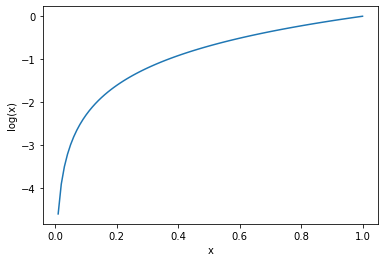

In [ ]:
#hide
plot_function(torch.log, min=0,max=1, ty='log(x)', tx='x')

:::{.callout-note}
Note how the derived formulas are applicable to calculate the loss for a _single_ image input.  In reality we'll have many more inputs and we'll take the average loss over a batch of inputs.  The loss for each item in the batch is $-log\,P(y_{true})$ - so: the negative log of the predicted probability of the true class.
:::

This observation is interesting, as the Cross-Entropy loss in this situation onliy looks at the loss on the predicted score for the true-label; ignoring all the rest.  Intuitively this makes sense however: the more weight and the closer the predicted probability for the true class is to 1, the less probability there's left for all other classes.

## Multi-label Classification

Multi-label classification is where we want to recognize more than a single label in a picture.  ("There's both a panda and a giraffe to be seen.")  Target and prediction vectors in this case are _not_ probabilities and the target is represented as a "one-hot" vector.  This vector has 1 for every class that appears in the picture and 0 for all other classes.

Cross-Entropy Loss cannot be used for these one-hot vectors as these do not represent probabilities.  (The sum for all items in such vecctor can be more than one.)  We can look at this problem however as a multiple single-label classification subtasks. For every label we calculate the cross-entropy loss: for "cat" that is 0.34, for "dog" that is 0.56, for "panda" that is 1.2.  The total loss is now just the sum of all the losses for every label: 0.34 + 0.56 + 1.2 = 2.1

## References

### Articles

- [MachineLearningMastery - Cross Entropy for Machine Learning](https://machinelearningmastery.com/cross-entropy-for-machine-learning/)
- [TowardsDataScience - Cross Entropy for Dummies](https://towardsdatascience.com/cross-entropy-for-dummies-5189303c7735)
- [TowardsDataScience - Cross Entropy for Classification](https://towardsdatascience.com/cross-entropy-for-classification-d98e7f974451)
- [KL divergence explained](https://www.countbayesie.com/blog/2017/5/9/kullback-leibler-divergence-explained)

### Videos

- [Intuitively understanding Shannon Entropy](https://www.youtube.com/watch?v=0GCGaw0QOhA)
- [Intuitively Understanding the KL Divergence](https://www.youtube.com/watch?v=SxGYPqCgJWM)
- [Intuitively Understanding the Cross Entropy Loss](https://www.youtube.com/watch?v=Pwgpl9mKars)